### Python Basics

#### **TASK 1:** Create an If...Else statement that will test whether a number is divisible by three. "YOUR VALUE is divisible by 3" should be printed if the value is divisible by three. 

In [3]:
num1=int(input("Test whether your number is divisible by three. What is your number?"))
if(num1%3==0):
    print("{} is divisible by 3".format(num1))
else:
    print("{} is not divisible by 3".format(num1))

Test whether your number is divisible by three. What is your number? 5


5 is not divisible by 3


#### **TASK 2:** Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the following should be printed: "YOUR FRUIT is acceptable."

In [4]:
fruit = input("What is your fruit?")

acceptablefruits = ["apple", "orange", "pear", "kiwi", "strawberry",
                    "Apple", "Orange", "Pear", "Kiwi", "Strawberry",
                    "APPLE", "ORANGE", "PEAR", "KIWI", "STRAWBERRY"] #added in various capitilizations to avoid discrepencies 

if fruit in acceptablefruits:
    print(str(fruit) + " is accetable.")
else: 
    print(str(fruit) + " is not acceptable.")

What is your fruit? pineapple


pineapple is not acceptable.


#### **TASK 3:** Create a function to calculate the distance between two coordinates using the Haversine formula. Write the following formula where the input parameters are a pair of coordinates as two lists.

In [120]:
import math
from math import radians
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

In [122]:
cities = pd.DataFrame(data={'City': ['London', 'Paris', 'Chicago', 'Edinburgh', 'Los Angeles'],
                            'Lat' : [51.5072, 48.8566, 41.8339, 55.9533, 34.0522],
                            'Lon' : [0.1276, 2.3522, -87.8720, 3.1883, 118.2437]})

In [121]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 +cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    return km

### Pandas and NumPy

In [1]:
import numpy as np #simplifying code 
import pandas as pd #simplifying code

In [2]:
trees = pd.read_csv('portland_park_trees.csv', index_col=0, sep=",", header=0) #reading in csv file
trees.head(5) #checking it is imported correctly, getting head
trees.shape

(25534, 39)

#### **QUESTION 1:**  How many trees are of the Quercus or Acer genus?

##### **Quercus genus**

In [5]:
Quercus = (trees['Genus'] == 'Quercus') #subsetting
trees.loc[Quercus]
Quercus.sum() #simple sum statement

2089

##### There are 2089 recorded trees from the Quercus genus.

##### **Acer genus**

In [7]:
Acer = (trees['Genus'] == 'Acer')
trees.loc[Acer]
Acer.sum()

3586

##### There are 3586 recorded trees from the Acer genus.

#### **QUESTION 2:** How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

##### **Quercus genus**

In [8]:
quercusDBH = trees [(trees["Genus"]=="Quercus") & (trees["DBH"]>50)][["Genus", "DBH"]]
print(quercusDBH)
quercusDBH.count()

         Genus   DBH
fid                 
1702   Quercus  51.5
2020   Quercus  58.5
2023   Quercus  54.1
2035   Quercus  68.3
2047   Quercus  57.9
...        ...   ...
19516  Quercus  53.5
19524  Quercus  59.4
21834  Quercus  56.4
24272  Quercus  69.9
24462  Quercus  59.0

[80 rows x 2 columns]


Genus    80
DBH      80
dtype: int64

##### There are 80 trees from the Quercus genus that also have a DBH larger than 50 inches.

##### **Acer genus**

In [9]:
acerDBH = trees [(trees["Genus"]=="Acer") & (trees["DBH"]>50)][["Genus", "DBH"]]
print(acerDBH)
acerDBH.count()

      Genus   DBH
fid              
128    Acer  50.5
153    Acer  50.5
155    Acer  52.7
163    Acer  56.3
594    Acer  50.9
596    Acer  53.0
681    Acer  52.7
815    Acer  53.5
840    Acer  53.5
1937   Acer  51.6
3078   Acer  52.7
3117   Acer  59.2
3128   Acer  52.6
3130   Acer  50.3
3218   Acer  58.0
3233   Acer  53.3
3248   Acer  55.0
3252   Acer  58.0
3254   Acer  65.0
5424   Acer  65.9
6160   Acer  50.1
6410   Acer  73.0
8917   Acer  54.0
12330  Acer  60.0
12337  Acer  58.4
12339  Acer  61.1
12397  Acer  62.8
15848  Acer  55.1
17244  Acer  54.8
18123  Acer  54.3
19710  Acer  56.5
19895  Acer  54.0
20168  Acer  52.4
20225  Acer  56.3
20236  Acer  66.7
20656  Acer  53.7
23319  Acer  51.0
23482  Acer  59.4
23870  Acer  59.3
23893  Acer  63.7
23933  Acer  55.8
23958  Acer  59.5
25500  Acer  84.5
25507  Acer  63.0


Genus    44
DBH      44
dtype: int64

##### There are 44 trees from the Acer genus that also have a DBH larger than 50 inches.

#### **QUESTION 3:** Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

##### **Quercus genus**

In [11]:
quercusDBHmean = ['Quercus'] #subsetting
trees["DBH"][trees['Genus'].isin(quercusDBHmean)].mean() #getting mean from within that subset

23.56823839157492

##### The mean DBH of the Quercus genus is 23.568 inches.

##### **Acer genus**

In [12]:
acerDBHmean = ['Acer'] 
trees["DBH"][trees['Genus'].isin(acerDBHmean)].mean()

18.419085331846066

##### The mean DBH of the Acer genus is 23.568 inches.

##### **Fraxinus genus**

In [13]:
fraxinusDBHmean = ['Fraxinus'] 
trees["DBH"][trees['Genus'].isin(fraxinusDBHmean)].mean()

11.033609693877551

##### The mean DBH of the Fraxinus genus is 11.034 inches.

#### **QUESTION 4:** How many different species of trees are recorded in the Acer genus?

In [14]:
acerspp_genus = pd.DataFrame(trees)
trees['Genus'] = trees['Genus_spec'].str.split(' ', expand=True)[0] #dividing Genus_spec to distinguish just Acer spp. within column
subset_acer = 'Acer'
acer_subset = trees[trees['Genus'] == subset_acer] #subsetting . . .
dif_acerspp = acer_subset['Genus_spec'].nunique() #getting rid of duplicate genus spp. within subset
print(dif_acerspp) #printing

20


##### There are 20 distinct species within the Acer genus.

#### **QUESTION 5:** Various questions based upon the world_cities.csv file . . .

In [15]:
cities = pd.read_csv('world_cities.csv', index_col=0, sep=",", header=0) #reading in csv file
cities.head(5) #checking it is imported correctly, getting head

,country,pop,lat,lon,capital
city,,,,,
'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
'Abdul Hakim,Pakistan,47788,30.55,72.11,0
'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
'Abud,Palestine,2456,32.03,35.07,0


In [16]:
cities.shape

(43645, 5)

##### Calculating new column named "pop_M" (population in millions), by transforming the "pop" (population) column.

In [17]:
cities["pop_M"] = cities["pop"] * 0.000001 #thousands into millions . . .
cities.head(5) #checking column was successfully created

,country,pop,lat,lon,capital,pop_M
city,,,,,,
'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,0.005629
'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,0.018999
'Abdul Hakim,Pakistan,47788,30.55,72.11,0,0.047788
'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0,0.021817
'Abud,Palestine,2456,32.03,35.07,0,0.002456


##### Removing the original 'pop' columndel cities['pop']
cities.head(5)


In [18]:
del cities['pop'] #simple deletion . . .
cities.head(5) #checking column was deleted

,country,lat,lon,capital,pop_M
city,,,,,
'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
'Abud,Palestine,32.03,35.07,0,0.002456


##### Choosing a city that starts with the first letter of my first name

In [19]:
print("Santa Isabel Information")
display(cities.iloc[33571])

Santa Isabel Information


country     Brazil
lat          -1.29
lon         -48.16
capital          0
pop_M      0.04062
Name: Santa Isabel do Para, dtype: object

##### Subseting the five biggest (i.e., largest population sizes) cities in Brazil

In [20]:
(cities.query("country == 'Brazil'")
     .sort_values(by="pop_M", ascending=False) #ascend false to have largest pop. size first
    .head(5)) #five biggest

,country,lat,lon,capital,pop_M
city,,,,,
Sao Paulo,Brazil,-23.53,-46.63,0,10.059502
Rio de Janeiro,Brazil,-22.91,-43.20,0,6.055582
Salvador,Brazil,-12.97,-38.50,0,2.762758
Belo Horizonte,Brazil,-19.92,-43.94,0,2.399577
Fortaleza,Brazil,-3.78,-38.59,0,2.349632


##### The five largest cities in Brazil by population are Sao Paulo, Rio de Janerio, Salvador, Belo Horizonte, and Fortaleza.

### Python Data Visualization

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plt as an alias
%matplotlib inline
import seaborn as sns

In [23]:
trees = pd.read_csv('portland_park_trees.csv', index_col=0, sep=",", header=0) #reading in csv file
trees.head(1) #checking it is imported correctly, getting head

,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,Notes,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
fid,,,,,,,,,,,,,,,,,,,,,
1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,NaN,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


#### **GRAPH 1:** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis

In [24]:
ulmus = trees[trees["Genus"]=="Ulmus"] #subsetting Ulmus . . .
ulmus
ulmus.head(1) #checking if subset worked . . .

,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,Notes,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
fid,,,,,,,,,,,,,,,,,,,,,
58,483,2017/05/19,ULPU,40.5,Poor,75.0,65.0,55.0,staff,NaN,...,Ulmus,Siberian elm,Ulmus pumila,BD,L,No,NaN,Yes,"Asia - eastern Siberia, Korea, northern China,...","Resistant to Dutch elm disease, and cross bred..."


     OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  CrownWidth  \
fid                                                                         
58        483  2017/05/19    ULPU  40.5      Poor        75.0        65.0   

     CrownWid_1 CollectedB Notes  ...  Genus    Common_nam    Genus_spec  \
fid                               ...                                      
58         55.0      staff   NaN  ...  Ulmus  Siberian elm  Ulmus pumila   

    Functional Size Native Edible  Nuisance  \
fid                                           
58          BD    L     No    NaN       Yes   

                                                Origin  \
fid                                                      
58   Asia - eastern Siberia, Korea, northern China,...   

                                            Species_fa  
fid                                                     
58   Resistant to Dutch elm disease, and cross bred...  

[1 rows x 39 columns]


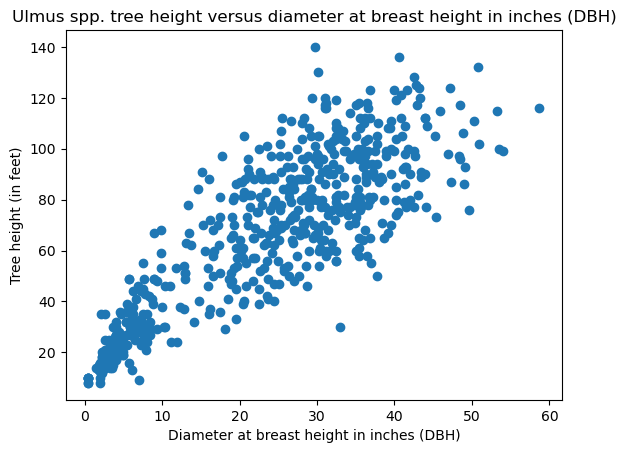

In [31]:
ulmus = trees[trees["Genus"]=="Ulmus"]
ulmus
print(ulmus.head(1))
Ulmus = (trees['Genus'] == 'Ulmus')
ulmusplot = plt.scatter(ulmus.DBH, ulmus.TreeHeight)
plt.title("Ulmus spp. tree height versus diameter at breast height in inches (DBH)")
plt.xlabel("Diameter at breast height in inches (DBH)")
plt.ylabel("Tree height (in feet)")
plt.show(ulmusplot)

#### **GRAPH 2:** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue

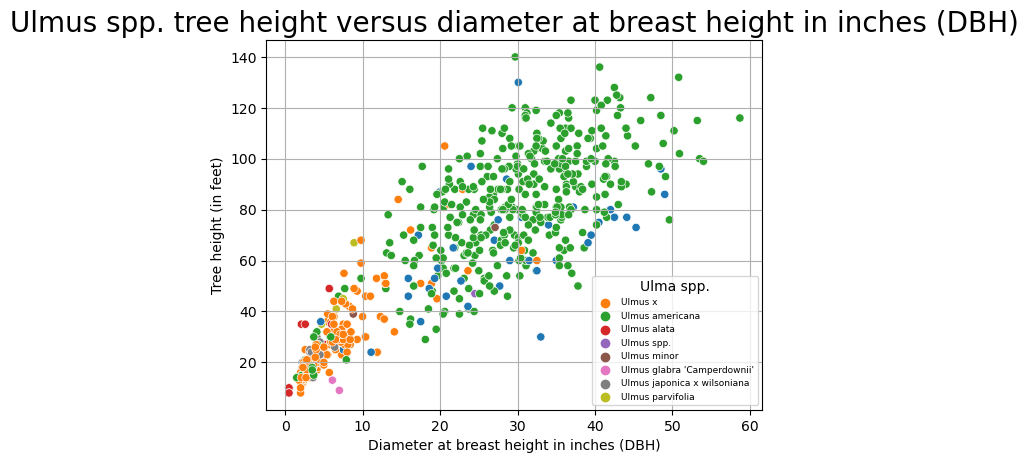

In [35]:
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", hue="Genus_spec", data=ulmus)
axs.set_title("Ulmus spp. tree height versus diameter at breast height in inches (DBH)", fontsize=20, color="#000000")
plt.xlabel("Diameter at breast height in inches (DBH)")
plt.ylabel("Tree height (in feet)")
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles=handles[1:], labels=labels[1:], title="Ulma spp.", fontsize=6.5, title_fontsize=10)
axs.grid(True)
fig.patch.set_facecolor('#FFFFFF')
plt.show(fig)

#### **GRAPH 3:** Create a boxplot of DBH for just the Ulmus genus differentiated by species

In [37]:
ulmusgenus_df = pd.DataFrame(trees)
ulmusgenus_df['ulmusgenus'] = ulmusgenus_df['Genus_spec'].str.split(' ', expand=True)[0]
Ulmus = 'Ulmus'
ulmusboxplot = ulmusgenus_df[ulmusgenus_df['Genus_spec'] == Ulmus]
sns.boxplot(x='Genus_spec', y='DBH', data=ulmusboxplot)

ValueError: min() arg is an empty sequence

## I have worked on trying to fix this box plot for a long time - throwing in the towel

#### **GRAPH 4:** Combine Graphs 1 and 3 into a single figure.

### Python GeoPandas

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

/var/folders/jt/dlkzlbf92fl8lbck5rjvdn8w0000gn/T/ipykernel_66404/2684456056.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


#### **TASK 1:** Read the selected dataset as GeoPandas DataFrame

In [58]:
stat = gpd.read_file('Felling_Permissions_and_Licences.shp')

###### Including what teh various attributes mean for clarity . . .

In [ ]:
#CASE_REFERENCE : Case reference number
#NAME_OF_PROPERTY : Property name
#STATUS : The current status of the application
#FELL_OPERATION_TYPE : The type of felling operation
#FELL_AREA : The applicants estimated area of felling. Applies to the specific operation
#FELL_VOLUME : The estimated volume from felling in cubic meters. Applies to the specific operation
#NEAREST_TOWN : Nearest town
#LOCAL_AUTH : Local Authority
#CONSERVANCY : Conservancy
#GRID_REF : National Grid Reference
#REGISTERED : Date Registered
#START_OF_PUBLIC_CONSULTATION : Public consultation start date
#END_OF_PUBLIC_CONSULTATION : Public consultation end date
#DECISION_ISSUED_ON : Date decision issued
#LICENCE_EXPIRY_DATE : Date licence expires
#RESTOCK_DUE_DATE : The date of any restocking requirements
#DATE_VALIDATED : The date of the licence decision
#DATE_CLOSED : The date the licence closed
#FELLING_OPERATION_SUMMARY_ID : Felling operation code 

#### **TASK 2:** Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

In [59]:
stat.head() #head for first 5

,case_refer,name_of_pr,status,felling_op,felling_ar,felling_vo,nearest_to,local_auth,conservanc,grid_refer,registered,start_of_p,end_of_pub,decision_i,licence_ex,restock_du,date_valid,date_close,felling__1,geometry
0,CB260528,Cessford Farm,Expired Permission,CF - Clear Felling,0.30,0.0,Morebattle,Scottish Borders Council,South Scotland Conservancy Area Office,NT734234,2018-11-28,2013-06-12,2013-07-10,2013-07-16,2015-07-15,2016-06-30,2018-05-12,2018-05-14,CB260528-CF,"POLYGON ((-269598.827 7460092.314, -269637.345..."
1,CB12526,Pitcastle Estate,Expired Permission,SF - Selective Felling,0.50,0.0,Strathtay,Perth and Kinross Council,Perth and Argyll Conservancy,NO906534,2018-11-28,2012-03-06,2012-04-03,2012-05-03,2014-04-19,2015-06-30,2018-05-12,2018-05-14,CB12526-SF,"POLYGON ((-422079.023 7690965.347, -422074.764..."
2,CB242068,Mary Thomsons Woods,Expired Permission,CF - Clear Felling,2.40,530.0,Clashmore,Highland Council,Highland and Islands Conservancy,NH721899,2018-11-28,2013-05-17,2013-06-14,2013-07-12,2015-06-28,1899-12-30,2018-05-12,2018-05-14,CB242068-CF,"POLYGON ((-464157.273 7942634.269, -464141.879..."
3,FLA-6310,Garbole,Active Permission,T - Thinning,10.00,0.0,Tomatin,Highland Council,Highland and Islands Conservancy,NH768245,2019-03-14,2020-06-22,2020-07-20,2020-08-19,2021-08-10,2023-06-30,2018-05-12,2018-05-14,FLA-6310-T,"POLYGON ((-450397.174 7820533.690, -450402.726..."
4,FPA-6753,Berwick Wood,Expired Permission,CF - Clear Felling,0.13,0.0,Hatton of Fintray,Aberdeenshire Council,Grampian Conservancy,NJ840179,2019-09-12,2019-10-11,2019-11-07,2019-11-11,2020-11-08,1899-12-30,2018-05-12,2018-05-14,FPA-6753-CF,"POLYGON ((-252077.677 7811904.236, -252157.404..."


In [60]:
stat.tail() #tail for last five

,case_refer,name_of_pr,status,felling_op,felling_ar,felling_vo,nearest_to,local_auth,conservanc,grid_refer,registered,start_of_p,end_of_pub,decision_i,licence_ex,restock_du,date_valid,date_close,felling__1,geometry
11154,FPA-8765,"Old Mains, Lumphanan",Active Permission,CF - Clear Felling,0.40,0.0,Lumphanan,Aberdeenshire Council,Grampian Conservancy,NJ568078,2021-12-22,2022-01-05,2022-01-05,2022-02-02,2023-02-02,2025-06-30,2018-05-12,2018-05-14,FPA-8765-CF,"POLYGON ((-302135.237 7792852.225, -302155.068..."
11155,FLA00961,Muirton,Expired Permission,CF - Clear Felling,9.73,850.0,Buckie,Moray Council,Grampian Conservancy,NJ457606,2018-11-16,2016-01-14,2016-02-11,2016-02-24,2018-02-23,2020-06-30,2018-05-12,2018-05-14,FLA00961-CF,"POLYGON ((-323861.227 7890445.407, -323878.744..."
11156,FPA-8869,Dalgonar Estate,Active Permission,CF - Clear Felling,1.54,0.0,Dunscore,Dumfries and Galloway Council,South Scotland Conservancy,NX855846,2022-01-17,2022-01-17,2022-02-14,2022-03-08,2024-03-08,2024-06-30,2018-05-12,2018-05-14,FPA-8869-CF,"POLYGON ((-423598.785 7390293.316, -423596.492..."
11157,FPA-8875,North Laws Plantation,Active Permission,SF - Selective Felling,0.30,0.0,Whitsome,Scottish Borders Council,South Scotland Conservancy Area Office,NT834496,2022-01-17,2022-01-18,2022-02-15,2022-02-25,2024-02-24,2025-06-30,2018-05-12,2018-05-14,FPA-8875-SF,"POLYGON ((-252016.840 7506659.142, -252103.200..."
11158,FPA-8875,North Laws Plantation,Active Permission,CF - Clear Felling,4.00,0.0,Whitsome,Scottish Borders Council,South Scotland Conservancy Area Office,NT834496,2022-01-17,2022-01-18,2022-02-15,2022-02-25,2024-02-24,2025-06-30,2018-05-12,2018-05-14,FPA-8875-CF,"MULTIPOLYGON (((-252267.844 7506904.816, -2521..."


#### **TASK 3:** Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.

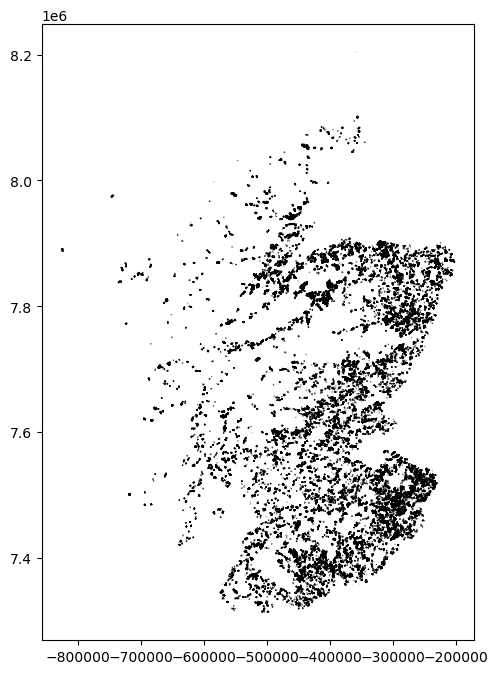

In [85]:
stat.plot(edgecolor="black", color="none");

#### **TASK 4:** What is the Coordinate Reference System of the selected dataset?

##### The coordinate reference system of the data is EPSG:OSGB 1936 / British National Grid (EPSG:27700).

#### **TASK 5:** How many features does the selected dataset contain?

In [81]:
len(stat)

11159

In [82]:
len(stat.columns)

20

##### This dataframe contains 20 different columns of data with 11,159 rows of data.

#### **TASK 6:** Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [98]:
smallerdf = stat[["case_refer","status","local_auth","felling_op", "felling_ar", "felling_vo"]] #making a smaller and more managable data frame
smallerdf.head()

,case_refer,status,local_auth,felling_op,felling_ar,felling_vo
0,CB260528,Expired Permission,Scottish Borders Council,CF - Clear Felling,0.30,0.0
1,CB12526,Expired Permission,Perth and Kinross Council,SF - Selective Felling,0.50,0.0
2,CB242068,Expired Permission,Highland Council,CF - Clear Felling,2.40,530.0
3,FLA-6310,Active Permission,Highland Council,T - Thinning,10.00,0.0
4,FPA-6753,Expired Permission,Aberdeenshire Council,CF - Clear Felling,0.13,0.0


In [99]:
localauthority = smallerdf['local_auth'] == 'Highland Council' #focusing on data from the highlands
localauthority

0        False
1        False
2         True
3         True
4        False
         ...  
11154    False
11155    False
11156    False
11157    False
11158    False
Name: local_auth, Length: 11159, dtype: bool

In [100]:
highlandauth =  smallerdf[localauthority]
highlandauth #cases in the highlands only

,case_refer,status,local_auth,felling_op,felling_ar,felling_vo
2,CB242068,Expired Permission,Highland Council,CF - Clear Felling,2.40,530.0
3,FLA-6310,Active Permission,Highland Council,T - Thinning,10.00,0.0
8,FPA-6648,Active Permission,Highland Council,CF - Clear Felling,52.18,0.0
22,CB259174,Expired Permission,Highland Council,CF - Clear Felling,4.50,2200.0
39,FPA-7388,Active Permission,Highland Council,CF - Clear Felling,5.20,0.0
...,...,...,...,...,...,...
11137,FPA-8598,Active Permission,Highland Council,CF - Clear Felling,0.13,0.0
11144,FPA-8445,Active Permission,Highland Council,CF - Clear Felling,1.54,0.0
11145,FPA-8503,Active Permission,Highland Council,CF - Clear Felling,1.10,0.0
11147,FPA-8846,S11.5 - Send Permission Conditions,Highland Council,CF - Clear Felling,1.33,0.0


#### **TASK 7:** Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute.

In [101]:
smallerdf = stat[["case_refer","status","local_auth","felling_op", "felling_ar", "felling_vo"]] #making a smaller and more managable data frame
smallerdf.head()

,case_refer,status,local_auth,felling_op,felling_ar,felling_vo
0,CB260528,Expired Permission,Scottish Borders Council,CF - Clear Felling,0.30,0.0
1,CB12526,Expired Permission,Perth and Kinross Council,SF - Selective Felling,0.50,0.0
2,CB242068,Expired Permission,Highland Council,CF - Clear Felling,2.40,530.0
3,FLA-6310,Active Permission,Highland Council,T - Thinning,10.00,0.0
4,FPA-6753,Expired Permission,Aberdeenshire Council,CF - Clear Felling,0.13,0.0


In [103]:
volume = smallerdf['felling_vo'] > 500 #focusing on felling volume, or velling_vo, the estimated volume from felling in cubic meters 
volume #boolean data . . .

0        False
1        False
2         True
3        False
4        False
         ...  
11154    False
11155     True
11156    False
11157    False
11158    False
Name: felling_vo, Length: 11159, dtype: bool

In [105]:
volgt500 =  smallerdf[volume]
volgt500 #printing cases where the operation felled more than 500 cubic meters only . . .

,case_refer,status,local_auth,felling_op,felling_ar,felling_vo
2,CB242068,Expired Permission,Highland Council,CF - Clear Felling,2.40,530.0
10,FLA03368,Expired Permission,Scottish Borders Council,CF - Clear Felling,1.78,1002.0
17,CB361097,Expired Permission,Aberdeenshire Council,CF - Clear Felling,3.88,887.0
20,FLA03408,Expired Permission,Angus Council,CF - Clear Felling,32.40,17000.0
22,CB259174,Expired Permission,Highland Council,CF - Clear Felling,4.50,2200.0
...,...,...,...,...,...,...
11133,FLA02711,Active Permission,Scottish Borders Council,T - Thinning,168.31,7900.0
11134,FPA-6364,Active Permission,Scottish Borders Council,T - Thinning,22.92,1014.0
11135,FLA-6032,Expired Permission,East Ayrshire Council,CF - Clear Felling,7.60,2280.0
11150,CB219395,Expired Permission,Aberdeenshire Council,CF - Clear Felling,5.42,1180.0


#### **TASK 8:** Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map.

In [108]:
import libpysal
import geopandas
import mapclassify
import matplotlib.pyplot as plt

mapclassify.__version__

'2.5.0'

AttributeError: Line2D.set() got an unexpected keyword argument 'scheme'

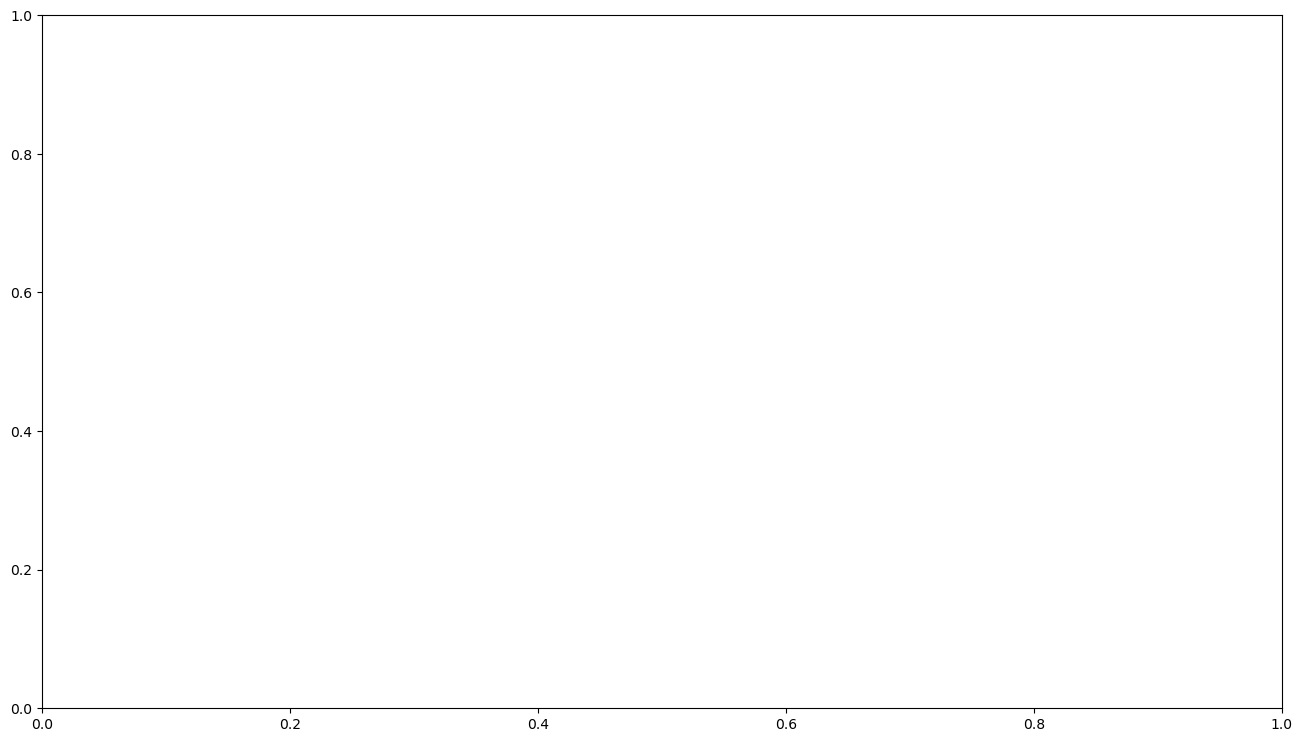

In [110]:
ax = smallerdf.plot(column="volgt500", scheme="quantiles", k=10, figsize=(16, 9))
ax.set_axis_off()

### Python Rasterrio

In [73]:
import matplotlib.pyplot as plt
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

#### **TASK 1:** Read the file as a rasterio dataset

In [65]:
elev_file = rio.open("elev.tif")
elev_arr = elev_file.read(1)
elev_arr

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

#### **TASK 2:** What is the CRS of the dataset?

In [66]:
stat.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### **TASK 3:** Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset.print(elev_file.bounds)

In [67]:
print(elev_file.bounds) #finding raster extent

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)


In [68]:
print(elev_file.count) #finding bands

1


#### **TASK 4:** Create a plot/map of the raster dataset.

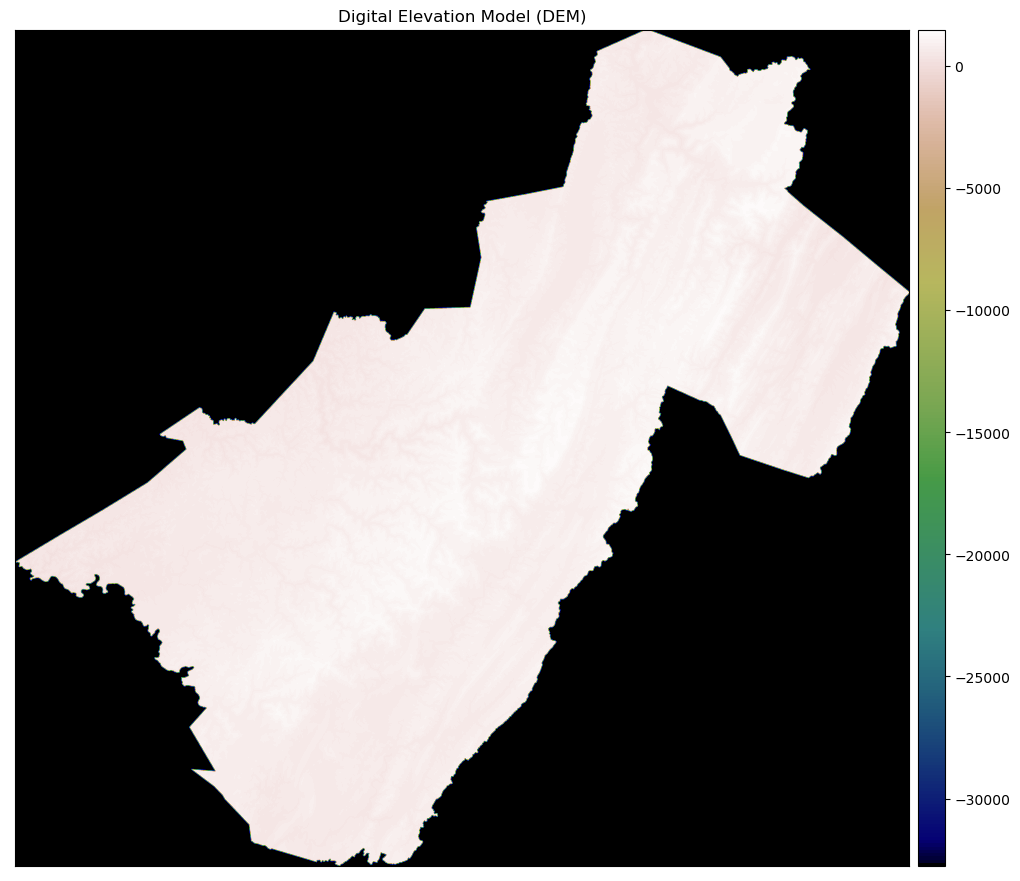

In [74]:
ep.plot_bands(elev_arr,
              title="Digital Elevation Model (DEM)",
              cmap="gist_earth")

plt.show()

In [77]:
# looks weird but has printed as expected - elev.tif is derived from a larger dataset

#### **TASK 5:** Create Histograms from the raster.

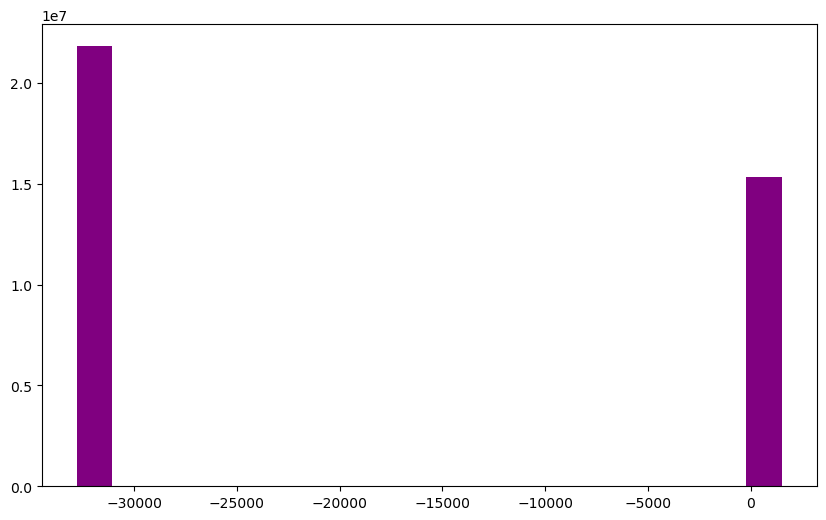

In [75]:
ep.hist(elev_arr,
        figsize=(10, 6))
plt.show()